<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/person_fall_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics opencv-python numpy

1. Gerekli Kütüphaneleri Yükleme

In [ ]:
!pip install ultralytics opencv-python numpy
from ultralytics import YOLO
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np

4. Görüntü Üzerinde Test (Fotoğraf)
Bir fotoğrafta düşme tespiti yapalım:

2. Fotoğrafı Yükleme (Colab'a Upload Etme)


In [ ]:
# Bu kodu çalıştırdığınızda "Dosya Seç" butonu çıkacak. Test için bir fotoğraf yükleyin.
uploaded = files.upload()

# Yüklenen dosyanın adını al (örneğin: 'fall.jpg')
image_path = next(iter(uploaded))
print("Yüklenen dosya:", image_path)

Saving fall.jpeg to fall.jpeg
Yüklenen dosya: fall.jpeg


3. Fotoğrafı Okuma ve Kontrol


In [ ]:
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Fotoğraf yüklenemedi! Lütfen dosya adını ve formatını kontrol edin (örneğin: .jpg, .png)")

4. YOLOv8 Pose Modelini Yükleme


In [ ]:
model = YOLO("yolov8n-pose.pt")  # Pose estimation modeli

5. Düşme Tespiti Fonksiyonu


In [ ]:
def detect_fall(keypoints):
    right_hip_y = keypoints[6][1]    # Sağ kalça (nokta 6)
    left_ankle_y = keypoints[12][1]  # Sol ayak bileği (nokta 12)
    right_knee_y = keypoints[14][1]  # Sağ diz (nokta 14)
    right_ankle_y = keypoints[16][1] # Sağ ayak bileği (nokta 16)

    # Düşme koşulu: Kalça ayak bileğinden aşağıda VEYA diz ayak bileğinden aşağıda
    return right_hip_y > left_ankle_y or right_knee_y > right_ankle_y

6. Pose Estimation Çalıştırma ve Sonuçları Görüntüleme



0: 448x640 1 person, 168.0ms
Speed: 4.7ms preprocess, 168.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


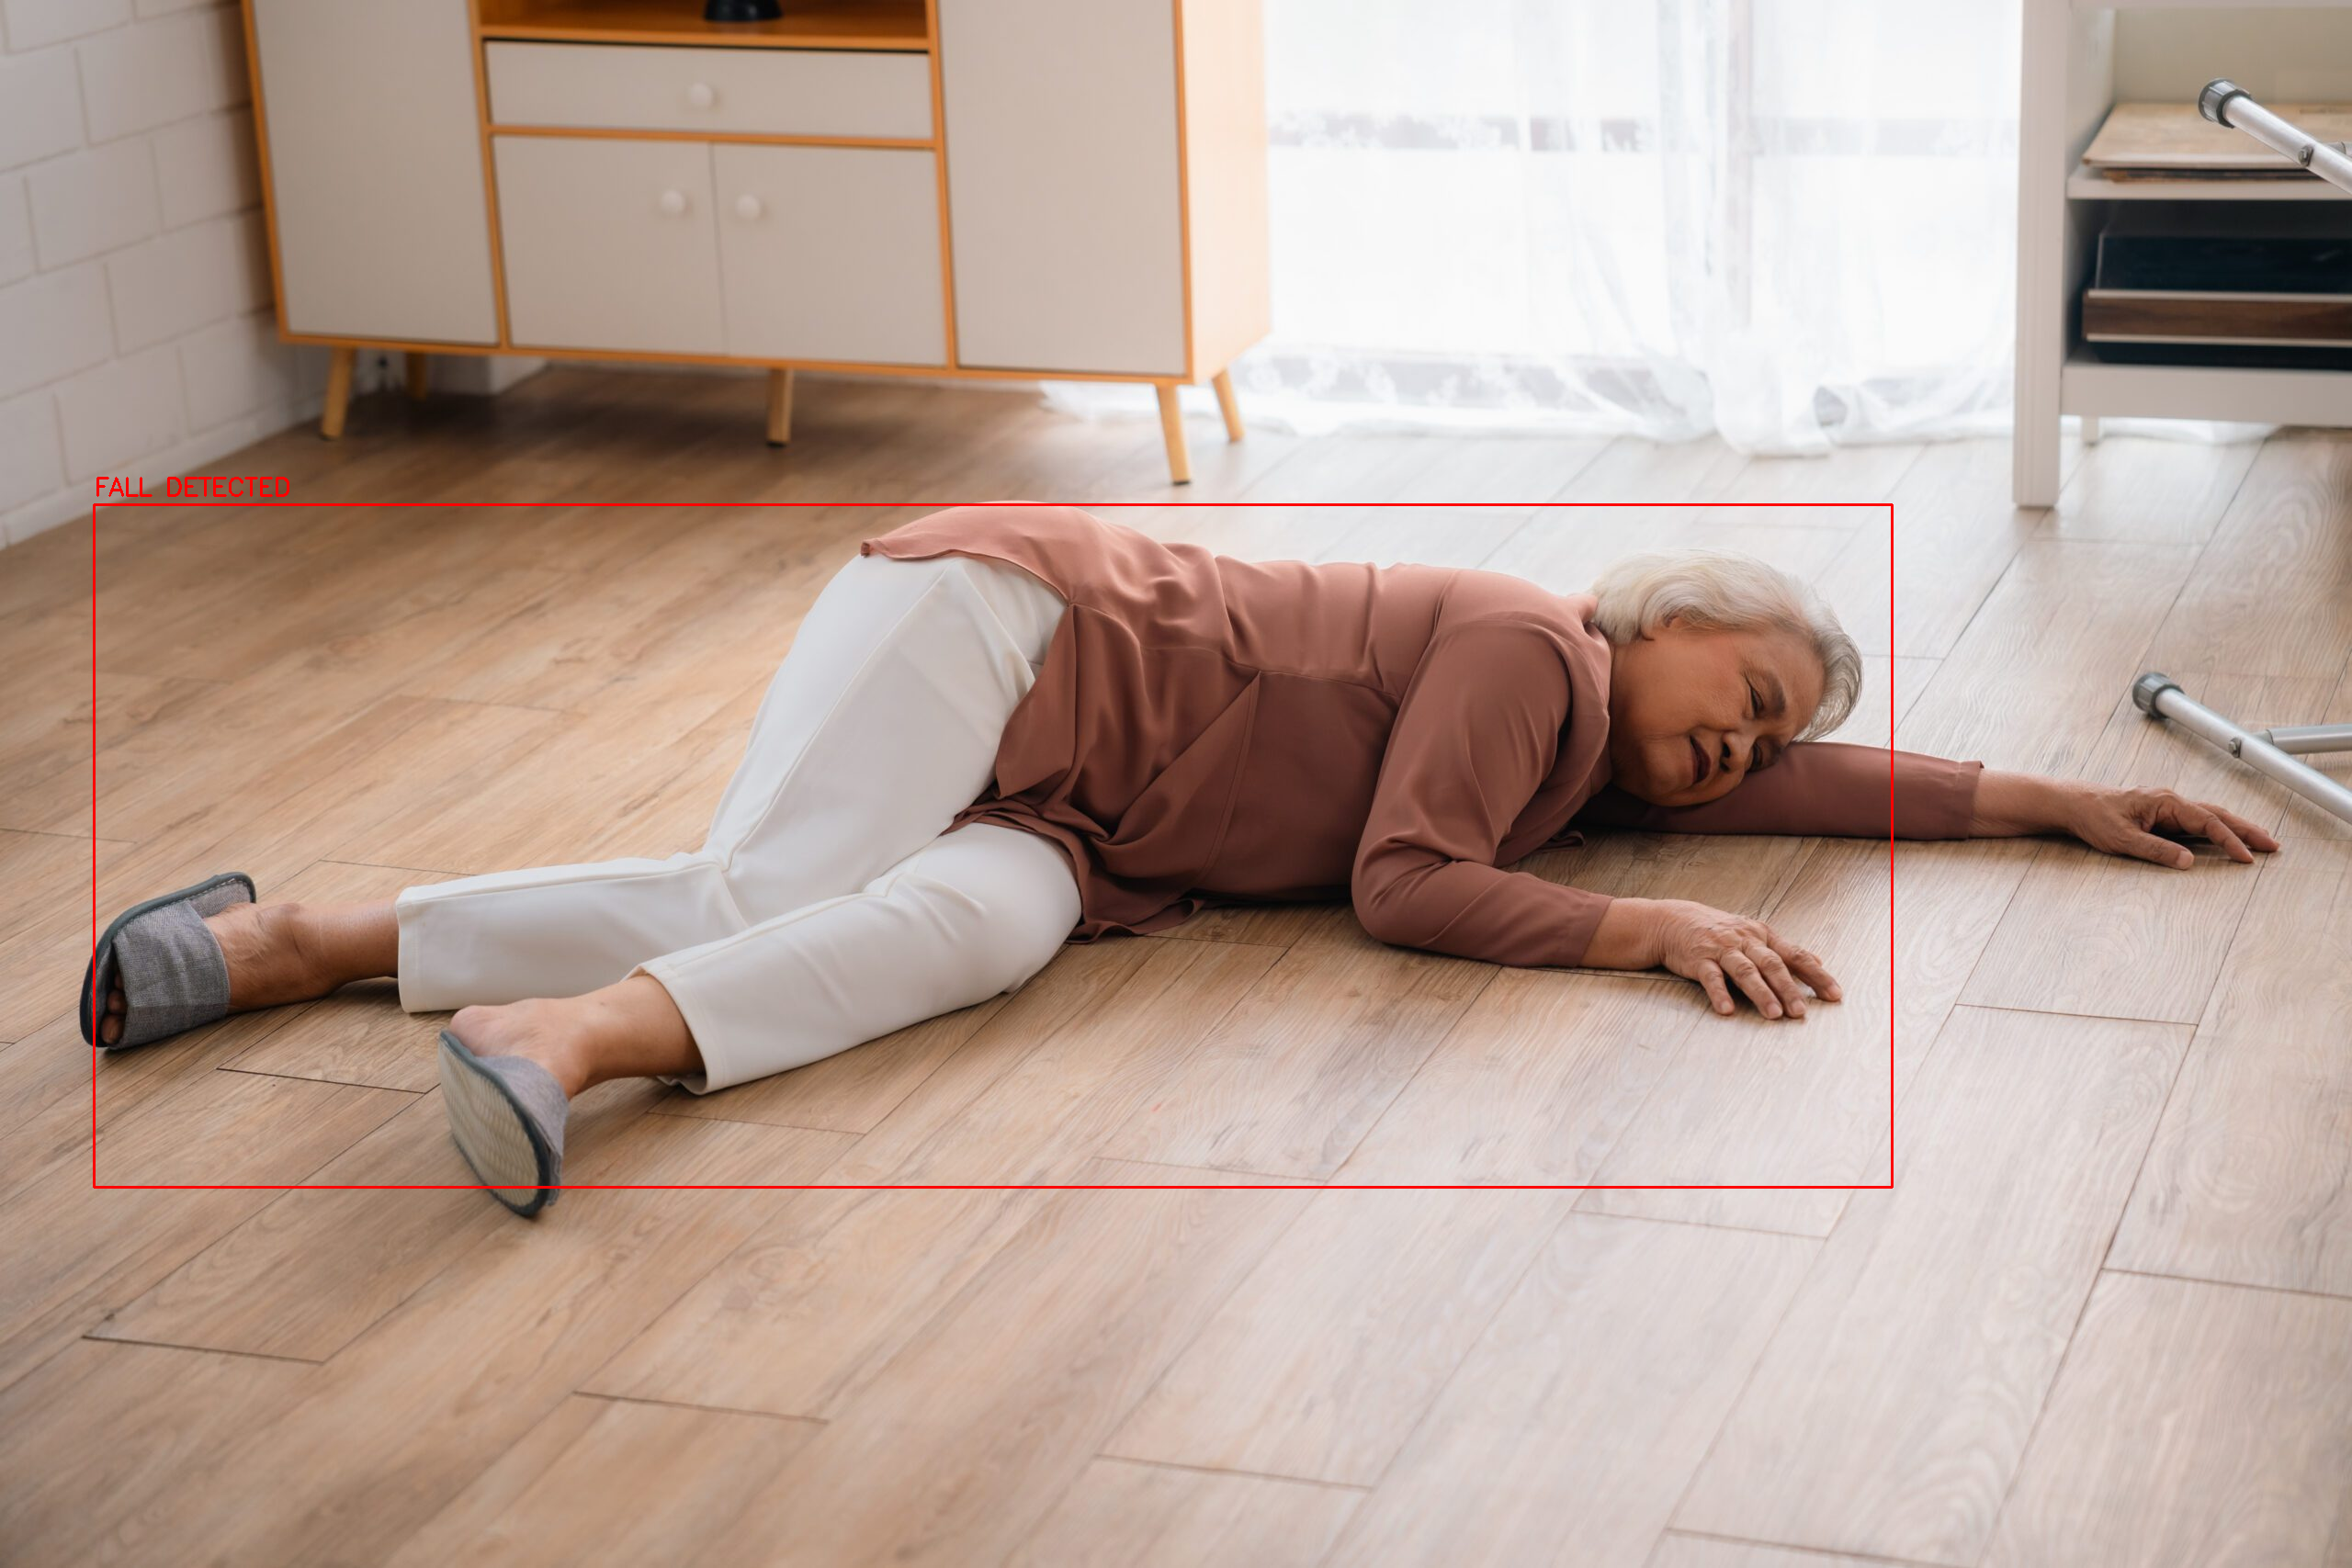

In [ ]:
# Modeli fotoğraf üzerinde çalıştır
results = model(image)

# Her bir tespit edilen kişi için düşme kontrolü yap
for result in results:
    for i, keypoints in enumerate(result.keypoints.xy):
        if detect_fall(keypoints):
            x1, y1, x2, y2 = result.boxes.xyxy[i].cpu().numpy().astype(int)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Kırmızı kutu
            cv2.putText(image, "FALL DETECTED", (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# Sonucu göster
cv2_imshow(image)

2. Videoyu Colab'a Yükleme


In [ ]:
# Bu kodu çalıştırdığınızda "Dosya Seç" butonu çıkacak (MP4/AVI formatında video yükleyin)
uploaded = files.upload()
video_path = next(iter(uploaded))  # Yüklenen videonun adını al (örneğin: 'fall_video.mp4')
print("Yüklenen video:", video_path)

Saving Falling on Ice 🧊 #fall #funny #fail #ice #slide #winter #santa.mp4 to Falling on Ice 🧊 #fall #funny #fail #ice #slide #winter #santa.mp4
Yüklenen video: Falling on Ice 🧊 #fall #funny #fail #ice #slide #winter #santa.mp4


3. Video Analizi için Modeli Yükleme


In [ ]:
model = YOLO("yolov8n-pose.pt")  # Pose estimation modeli

In [ ]:
def detect_fall(keypoints):
    right_hip_y = keypoints[6][1]    # Sağ kalça (nokta 6)
    left_ankle_y = keypoints[12][1]  # Sol ayak bileği (nokta 12)
    right_knee_y = keypoints[14][1]  # Sağ diz (nokta 14)
    right_ankle_y = keypoints[16][1] # Sağ ayak bileği (nokta 16)
    return right_hip_y > left_ankle_y or right_knee_y > right_ankle_y

5. Video Üzerinde İşlem Yapma


In [ ]:
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Pose estimation çalıştır
    results = model(frame)

    # Her bir kişi için düşme kontrolü
    for result in results:
        for i, keypoints in enumerate(result.keypoints.xy):
            if detect_fall(keypoints):
                x1, y1, x2, y2 = result.boxes.xyxy[i].cpu().numpy().astype(int)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Kırmızı kutu
                cv2.putText(frame, "FALL DETECTED", (x1, y1-10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Sonucu göster (Colab'da)
    cv2_imshow(frame)
    if cv2.waitKey(1) == ord('q'):  # 'q' tuşu ile çıkış
        break

cap.release()